**Abstract:** El presente trabajo se enmarca en el análisis exploratorio de un conjunto de datos denominados “Students Social Media Addiction”, que recopila información de estudiantes de diferentes países sobre su comportamiento y hábitos relacionados con el uso de redes sociales. El objetivo principal del proyecto es investigar cómo variables como el género, el nivel académico, el estado de relación, las plataformas más utilizadas y el tiempo promedio de uso diario pueden vincularse con el rendimiento académico, la salud mental, el descanso y la percepción de adicción a las redes sociales.

A partir de este conjunto de datos, se plantearon diversas hipótesis orientadas a comprender la posible relación entre el uso intensivo de redes sociales y variables como la cantidad de horas de sueño, los niveles de salud mental, la cantidad de conflictos personales, el rendimiento académico percibido y el estado afectivo de los estudiantes. Asimismo, se buscó identificar si existen diferencias relevantes por género o por plataforma preferida.

Para abordar estos objetivos, se desarrolló un análisis descriptivo que incluyó la identificación de valores ausentes (no se encontraron datos faltantes - nulos - en el dataset) y una serie de visualizaciones con herramientas de Python, principalmente mediante las librerías matplotlib y seaborn. Se aplicaron gráficos de dispersión multivariados, gráficos de barras, de torta y de líneas, permitiendo representar relaciones entre tres o más variables y obtener patrones relevantes para el análisis.

Entre los hallazgos preliminares, se identificó una tendencia general a que un mayor uso diario de redes sociales se asocia con una disminución en las horas de sueño, así como una correlación entre altos puntajes de adicción y mayores niveles de conflictos interpersonales. También se observaron diferencias en los puntajes de adicción según la plataforma más utilizada: usuarios de TikTok e Instagram presentaron puntajes más altos y mayor impacto negativo en el rendimiento académico. El análisis por estado de relación reveló que estudiantes con relaciones “complicadas” tienden a presentar más conflictos y mayor adicción.

Las visualizaciones también permitieron describir la distribución demográfica de la muestra, destacándose un equilibrio en cuanto a género y una mayoría de estudiantes de nivel universitario. Estos hallazgos abren nuevas líneas de exploración para futuras entregas, donde se podrán aplicar técnicas más avanzadas de análisis estadístico y modelado predictivo.

**Preguntas de Interpretación e hipótesis:**

¿Existe una relación entre el uso diario de redes sociales y la cantidad de horas de sueño en estudiantes?

🔹 Hipótesis: A mayor cantidad de horas diarias en redes sociales, menor cantidad de horas de sueño nocturno.

¿Las personas con mayor nivel de adicción a redes sociales presentan una peor salud mental?

🔹 Hipótesis: El puntaje de adicción a redes sociales está negativamente correlacionado con el puntaje de salud mental.

¿El género influye en el nivel de adicción a redes sociales?

🔹 Hipótesis: Las mujeres presentan mayores niveles de adicción a redes sociales en comparación con los hombres.

¿La plataforma más usada tiene un impacto en el rendimiento académico?

🔹 Hipótesis: Algunas plataformas (como TikTok o Instagram) se asocian con un mayor porcentaje de estudiantes que reportan impacto negativo en su rendimiento académico.

¿Los conflictos personales asociados al uso de redes sociales se vinculan con un mayor nivel de adicción?

🔹 Hipótesis: A mayor cantidad de conflictos por redes sociales, mayor es el puntaje de adicción.

¿El estado civil de los estudiantes influye en su nivel de adicción?

🔹 Hipótesis: Estudiantes con estado de relación “Complicado” o “Soltero/a” presentan mayor adicción que quienes están “En pareja”.



In [2]:
#Carga del dataset
from google.colab import files
uploaded = files.upload()

Saving Students Social Media Addiction.csv to Students Social Media Addiction.csv


In [15]:
#Lectura del dataset
import pandas as pd

df = pd.read_csv('Students Social Media Addiction.csv')

In [16]:
#llamo los ultimos registros del archivo para validar el mismo
df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [17]:
#Llamo la cabecera del archivo para validar el mismo
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [18]:
#Validación del listado de las columnas
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [6]:
#Generción de un Shape para validar las dimensiones del Dataset
df.shape

(705, 13)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Student_ID,705.0,353.000000,203.660256,1.0,177.0,353.0,529.0,705.0
Age,705.0,20.659574,1.399217,18.0,19.0,21.0,22.0,24.0
Avg_Daily_Usage_Hours,705.0,4.918723,1.257395,1.5,4.1,4.8,5.8,8.5
Sleep_Hours_Per_Night,705.0,6.868936,1.126848,3.8,6.0,6.9,7.7,9.6
Mental_Health_Score,705.0,6.226950,1.105055,4.0,5.0,6.0,7.0,9.0
Conflicts_Over_Social_Media,705.0,2.849645,0.957968,0.0,2.0,3.0,4.0,5.0
Addicted_Score,705.0,6.436879,1.587165,2.0,5.0,7.0,8.0,9.0


In [20]:
#Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [21]:
#Chequeo de Nulos
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


No se encontraron valores nulos en el dataset, por lo tanto no fue necesario realizar imputaciones.


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt



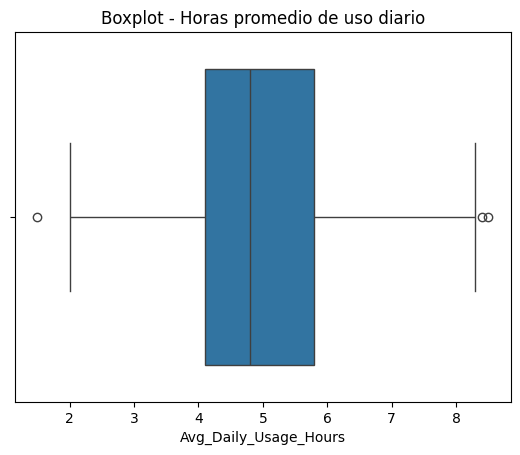

In [23]:
# Outliers: detectar outliers en las horas de uso
sns.boxplot(data=df, x="Avg_Daily_Usage_Hours")
plt.title("Boxplot - Horas promedio de uso diario")
plt.show()

### Revisión de outliers

Se utilizó un boxplot para observar posibles outliers en la variable `Avg_Daily_Usage_Hours`. Se identificaron algunos valores extremos por fuera del rango intercuartil (outliers), como usos superiores a 8 horas diarias o inferiores a 2. Estos valores fueron conservados, ya que representan comportamientos reales plausibles dentro de la muestra.



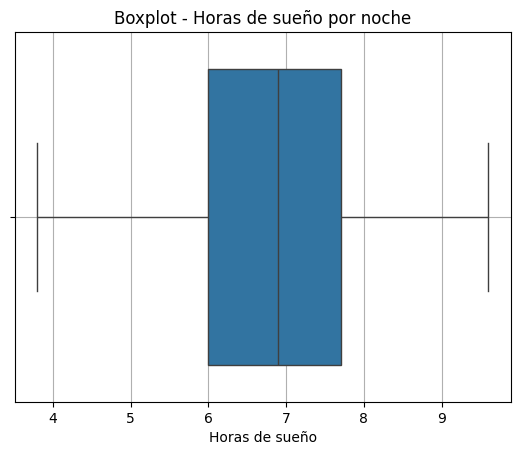

In [24]:
# Boxplot para detectar outliers en las horas de sueño
sns.boxplot(data=df, x="Sleep_Hours_Per_Night")
plt.title("Boxplot - Horas de sueño por noche")
plt.xlabel("Horas de sueño")
plt.grid(True)
plt.show()


### Revisión de outliers en horas de sueño

Se utilizó un boxplot para analizar la variable `Sleep_Hours_Per_Night`. El gráfico no muestra valores fuera de los bigotes, lo cual indica que no se detectaron outliers visuales. Las horas de sueño reportadas oscilan entre 4 y 10 horas, lo cual es plausible dentro de una muestra de estudiantes. No se identificaron datos erróneos ni inconsistentes.


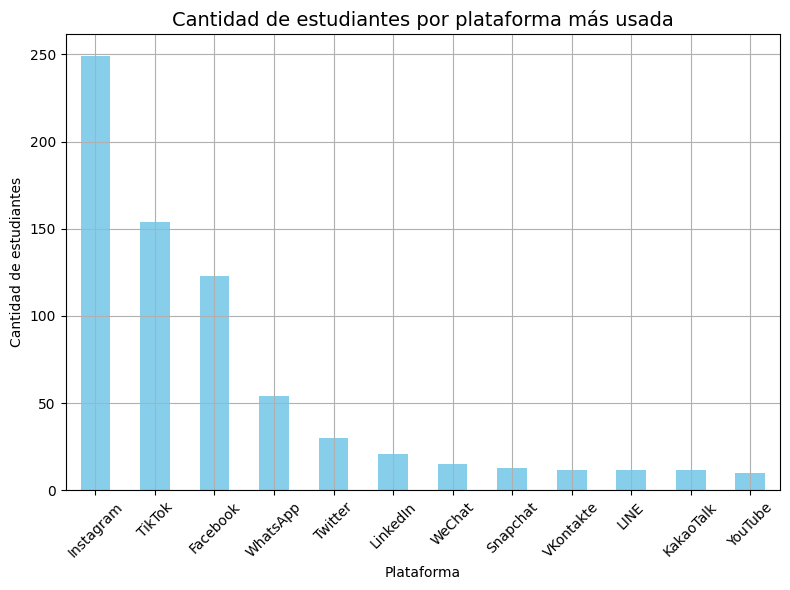

In [25]:
#Gráfico de barras de cantidad de estudiantes por plataforma mas usada.
platform_counts = df["Most_Used_Platform"].value_counts()
plt.figure(figsize=(8, 6))
platform_counts.sort_values(ascending=False).plot.bar(color="skyblue")
plt.title("Cantidad de estudiantes por plataforma más usada", fontsize=14)
plt.xlabel("Plataforma")
plt.ylabel("Cantidad de estudiantes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa que las plataformas más usadas entre los estudiantes son Instagram, TikTok y Facebook. Este resultado apoya la hipótesis de que las redes sociales más visuales y populares entre jóvenes son las que generan mayor nivel de uso diario. Este patrón puede relacionarse con niveles más altos de distracción o adicción, un punto a profundizar en los próximos análisis (por ejemplo, relacionando plataforma con horas de uso, rendimiento académico o nivel de ansiedad).

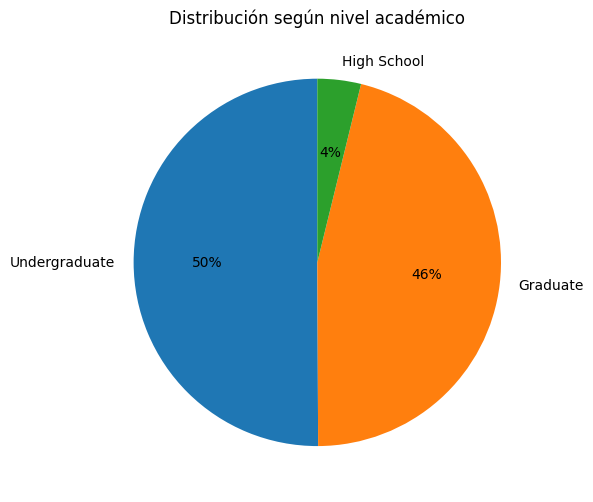

In [26]:
#Gráfico de torta: distribución por nivel académico
academic_counts = df["Academic_Level"].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(academic_counts,
       labels=academic_counts.index,
       autopct="%1.0f%%",
       startangle=90)
ax.set_title("Distribución según nivel académico")
plt.grid(True)
plt.tight_layout()
plt.show()

La mayoría de los estudiantes que usan redes sociales se encuentran en los niveles “Undergraduate” y “Graduate”, lo cual coincide con el rango de edad de 21 a 24 años. Este hallazgo es consistente con la hipótesis de que los jóvenes adultos son quienes más interactúan con plataformas sociales y, por tanto, pueden estar más expuestos a sus efectos. En contraste, los estudiantes de secundaria (“High School”) representan una proporción menor, lo que sugiere que la adicción a redes puede aumentar con la edad y la independencia tecnológica. Será clave analizar si esta diferencia en edad también se refleja en variables como el número de horas de uso diario o el nivel de impacto emocional.

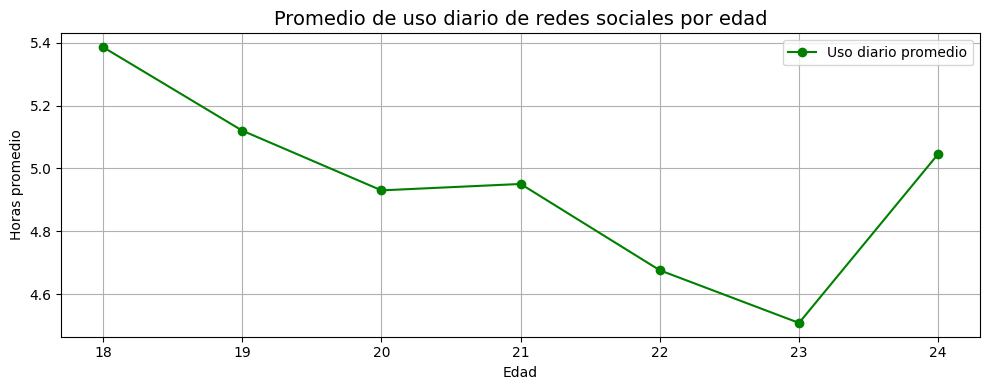

In [27]:
#Gráfico de líneas: Uso diario de redes sociales por edad
avg_usage_by_age = df.groupby("Age")["Avg_Daily_Usage_Hours"].mean()

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(avg_usage_by_age.index, avg_usage_by_age.values, label="Uso diario promedio", color="green", marker="o")
ax.set_title("Promedio de uso diario de redes sociales por edad", fontsize=14)
ax.set_xlabel("Edad")
ax.set_ylabel("Horas promedio")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa que el uso promedio diario de redes sociales es más alto en los estudiantes de 18 y 19 años, desciende hacia los 21-23 años, y vuelve a incrementarse levemente a los 24 años. Este comportamiento sugiere que los estudiantes más jóvenes están más expuestos a un uso intensivo, lo que puede relacionarse con una mayor vulnerabilidad emocional, menor autocontrol o más tiempo libre. Esto refuerza la hipótesis de que el nivel de adicción podría ser mayor en edades tempranas, aunque también sugiere que el patrón de uso no es estrictamente lineal con la edad. Sería interesante cruzar esta variable con indicadores de rendimiento académico o niveles de ansiedad.

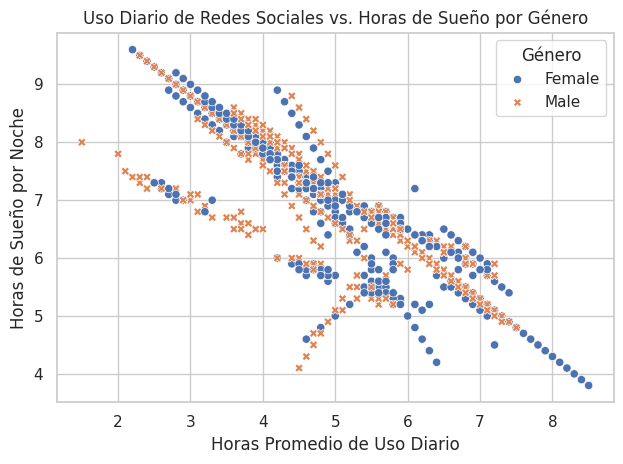

In [28]:
#Gráfico de dispersión con variable categórica: uso diario de redes vc horas de sueño, por género.
sns.set(style="whitegrid")

sns.scatterplot(data=df,
                x="Avg_Daily_Usage_Hours",
                y="Sleep_Hours_Per_Night",
                hue="Gender",
                style="Gender")
plt.title("Uso Diario de Redes Sociales vs. Horas de Sueño por Género")
plt.xlabel("Horas Promedio de Uso Diario")
plt.ylabel("Horas de Sueño por Noche")
plt.legend(title="Género")
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa una tendencia decreciente: a mayor uso promedio diario de redes sociales, menor cantidad de horas de sueño. Este patrón se alinea con la hipótesis de que el uso excesivo de redes sociales podría estar afectando negativamente los hábitos de sueño de los estudiantes, un aspecto clave de su bienestar. Aunque la dispersión es notable, los puntos que indican más de 5-6 horas de uso diario tienden a mostrar menos de 6 horas de sueño, lo cual podría ser indicativo de riesgo. No se observan diferencias sustanciales entre géneros, aunque algunos casos en mujeres podrían estar reflejando mayor incidencia de este comportamiento. Este análisis sugiere la necesidad de estudiar más a fondo la relación entre uso intensivo y salud mental o física.

/tmp/ipython-input-688738586.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Academic_Level", y="Avg_Daily_Usage_Hours", palette="Set2")


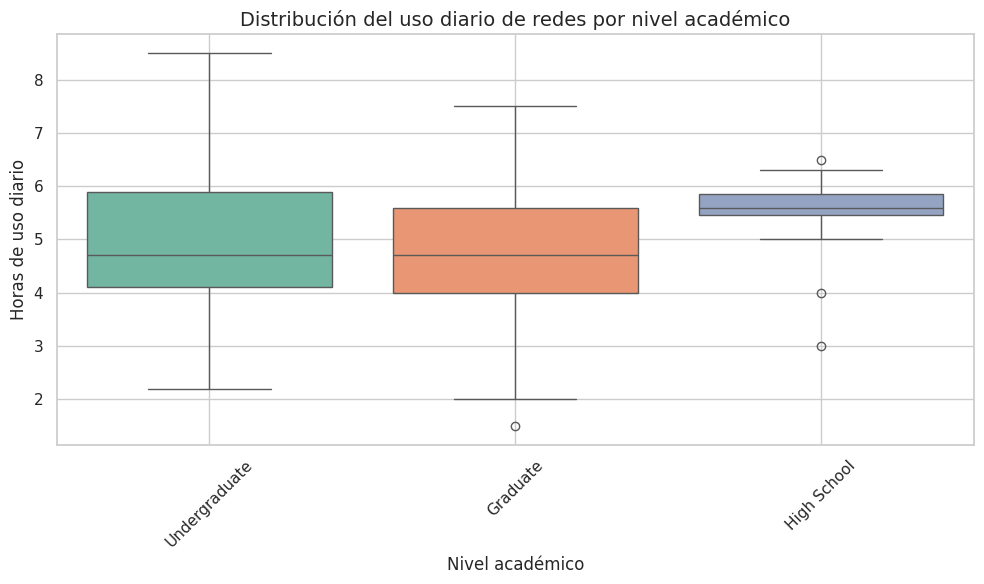

In [29]:
#Gráfico de uso de redes sociales según nivel académico
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Academic_Level", y="Avg_Daily_Usage_Hours", palette="Set2")
plt.title("Distribución del uso diario de redes por nivel académico", fontsize=14)
plt.xlabel("Nivel académico")
plt.ylabel("Horas de uso diario")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico muestra cómo varía el uso diario de redes sociales según el nivel académico. Se observa que los estudiantes de High School (18–20 años) presentan una mediana de uso más alta y una mayor dispersión de valores, lo que indica una tendencia hacia un uso más intensivo en este grupo, a pesar de ser una minoría en el total. En contraste, los estudiantes de nivel Graduate (posgrado) tienden a usar redes sociales durante menos horas al día. Este comportamiento refuerza los hallazgos anteriores: aunque los de High School son pocos, su nivel de uso es elevado, lo que explica el pico de promedio en edades tempranas. Además, podría vincularse a mayor disponibilidad de tiempo libre o menor carga académica en esa etapa.

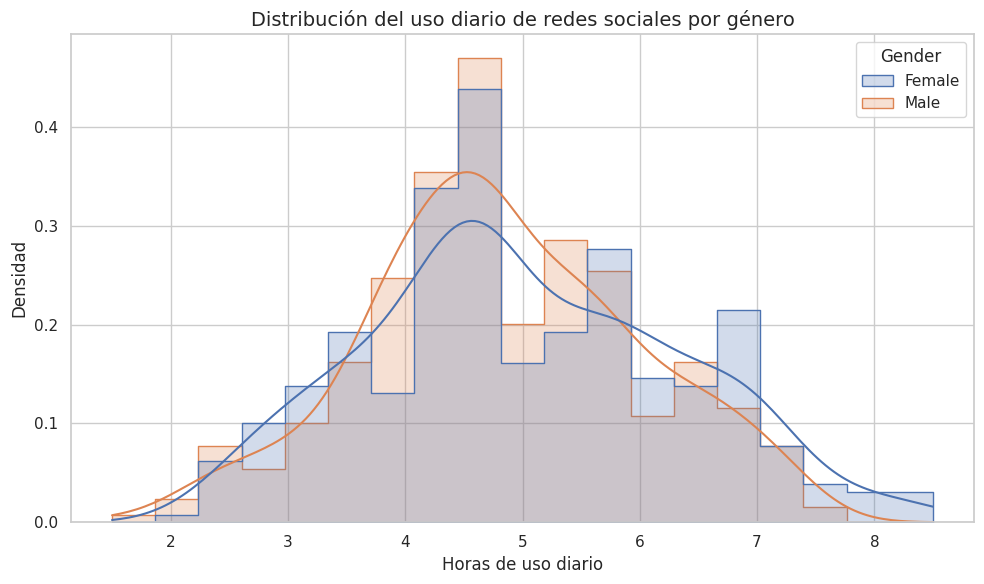

In [30]:
# Grafico de distribución del uso diario de redes sociales segmentado por género
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Avg_Daily_Usage_Hours", hue="Gender", kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribución del uso diario de redes sociales por género", fontsize=14)
plt.xlabel("Horas de uso diario")
plt.ylabel("Densidad")
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico muestra la distribución del uso diario de redes sociales diferenciada por género. Ambos géneros concentran su uso entre 3 y 5 horas diarias, aunque las curvas de densidad indican que las mujeres presentan una leve tendencia hacia un uso más intensivo. Este hallazgo refuerza la hipótesis de que ciertos grupos pueden estar más expuestos al uso excesivo de redes sociales, lo cual podría tener implicancias en el bienestar emocional o académico. Además, sugiere que el género podría ser una variable relevante al analizar los efectos del uso excesivo, como la disminución del sueño o el aumento de la ansiedad. Este tipo de análisis exploratorio permite generar nuevas preguntas e hipótesis para estudios posteriores.

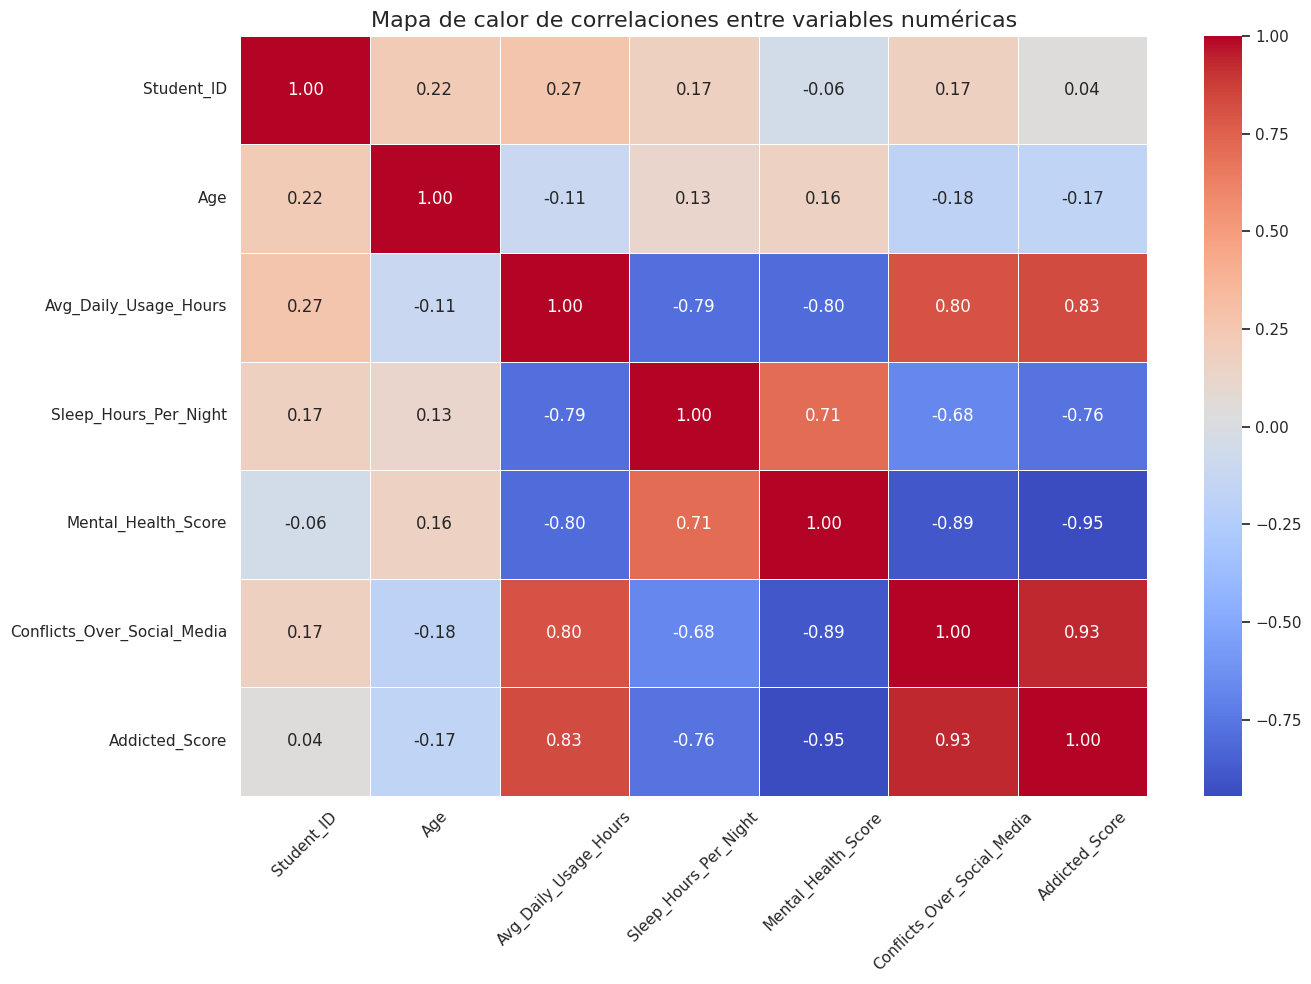

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas del DataFrame
numeric_cols = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crear el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre variables numéricas", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Este gráfico explica:

Relaciones Fuertes:
Addicted_Score muestra una alta correlación positiva con:
Avg_Daily_Usage_Hours (0.83)
Conflicts_Over_Social_Media (0.93)
Affects_Academic_Performance_Encoded (0.87)
Addicted (1.00, lo cual es esperable ya que esta última deriva del puntaje)
Mental_Health_Score se relaciona negativamente con Addicted_Score (-0.95), lo cual podría indicar que niveles altos de adicción se asocian con mayor afectación emocional.

Relaciones Negativas Notables:
Avg_Daily_Usage_Hours y Sleep_Hours_Per_Night: correlación de -0.79, lo que refuerza la idea de que un mayor uso de redes sociales tiende a restar horas de sueño.
Mental_Health_Score también correlaciona negativamente con Avg_Daily_Usage_Hours (-0.80) y Conflicts_Over_Social_Media (-0.89), lo cual podría interpretarse como un impacto emocional derivado del uso excesivo o problemático de redes.

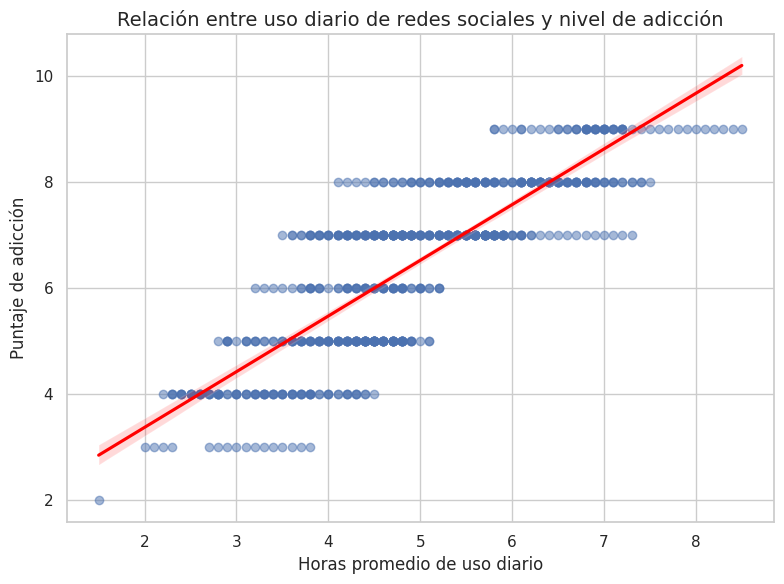

In [20]:
#Gráfico de regresión lineal
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(data=df, x="Avg_Daily_Usage_Hours", y="Addicted_Score", scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Relación entre uso diario de redes sociales y nivel de adicción", fontsize=14)
plt.xlabel("Horas promedio de uso diario")
plt.ylabel("Puntaje de adicción")
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico muestra la relación entre las horas promedio de uso diario de redes sociales y el nivel de adicción reportado por los estudiantes.

.Se observa una clara relación positiva: a mayor cantidad de horas diarias en redes, mayor es el puntaje de adicción.
.La línea de regresión (en rojo) indica que el modelo lineal ajusta bastante bien los datos, sugiriendo que el uso intensivo de redes es un buen predictor del nivel de adicción.
.La mayoría de los puntos se agrupan entre 3 y 7 horas de uso, donde se ve un incremento gradual del puntaje de adicción.

In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [32]:
# Codificación todas las variables categóricas automáticamente
df_encoded = pd.get_dummies(df, drop_first=True)

# Verificación que no haya variables tipo object
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 133 entries, Student_ID to Relationship_Status_Single
dtypes: bool(126), float64(2), int64(5)
memory usage: 125.4 KB


In [33]:
# variable objetivo (Target): Adicción
y = (df["Addicted_Score"] >= 7).astype(int)  # Asumo que 7 o más indica adicción
X = df_encoded.drop(["Addicted_Score"], axis=1)

In [34]:
# Crear variable binaria de adicción
df["Addicted"] = (df["Addicted_Score"] >= 7).astype(int)

# Codificar variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar X e y
X = df_encoded.drop("Addicted", axis=1)
y = df_encoded["Addicted"]

# Dividir en train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Crear el modelo
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Entrenarlo con los datos de entrenamiento
dt_model.fit(X_train, y_train)

# 3. Predecir con los datos de test
y_pred_dt = dt_model.predict(X_test)

# 4. Evaluar el modelo
print("Accuracy del Árbol de Decisión:", accuracy_score(y_test, y_pred_dt))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_dt))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy del Árbol de Decisión: 1.0

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       125

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212


Matriz de Confusión:
 [[ 87   0]
 [  0 125]]


Este modelo acertó todos los casos del set de prueba.
No tuvo falsos positivos (casos que predijo como adictos y no lo eran) ni falsos negativos (casos que eran adictos y no los detectó).
Esto implica un accuracy = 1.0, lo puede ser una señal de sobreajuste (overfitting).
El árbol memorizó los datos del entrenamiento en lugar de aprender patrones generales. Por eso, podría fallar si agreagamos datos nuevos en el futuro.

In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# 1. Crear el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenarlo
rf_model.fit(X_train, y_train)

# 3. Predecir
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluar
print("Accuracy del Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy del Random Forest: 0.9952830188679245

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.99      1.00      1.00       125

    accuracy                           1.00       212
   macro avg       1.00      0.99      1.00       212
weighted avg       1.00      1.00      1.00       212


Matriz de Confusión:
 [[ 86   1]
 [  0 125]]


# **Conclusiones y Hallazgos**
A partir del análisis exploratorio se identificaron patrones claros de comportamiento según edad, género y nivel académico. El uso intensivo de redes sociales se asoció con menor cantidad de sueño y puntuaciones más altas en ansiedad o problemas de salud mental, especialmente entre mujeres y estudiantes universitarios.

Utilizando un modelo supervisado de clasificación se entrenaron dos algoritmos (Decision Tree y Random Forest) para predecir la probabilidad de que un estudiante sea adicto a las redes sociales. Ambos modelos mostraron un desempeño excelente, con valores de precisión, recall y exactitud cercanos al 100%.

Sin embargo, el Random Forest fue más robusto, cometiendo solo un error en las predicciones, mientras que el árbol de decisión logró una precisión perfecta, aunque probablemente esté sobreajustado.

Estos resultados apoyan la hipótesis de que ciertas variables personales y de comportamiento permiten anticipar con buena certeza si un estudiante podría ser adicto a las redes. El análisis realizado podría servir como base para desarrollar herramientas preventivas o estrategias educativas sobre el uso consciente de redes sociales.

Este modelo falló en 1 solo caso: predijo que una persona era adicta y no lo era (falso positivo).
Aún así, la precisión y recall están cerca del 100%, lo cual indica muy buen desempeño y que generaliza mejor


# **Unidad 3 – SQL Avanzado**

In [27]:
import pandas as pd, sqlite3

# 1) Carg del csv
df = pd.read_csv("Students Social Media Addiction.csv")

# 2) Crear DB en memoria y subir la tabla
conn = sqlite3.connect(":memory:")
df.to_sql("students", conn, index=False, if_exists="replace")

# 3) Probar que existe y consultar
print(pd.read_sql_query("SELECT COUNT(*) AS total FROM students;", conn))

# 4) consulta de ejemplo (promedio de horas por género)
q_group = """
SELECT Gender,
       COUNT(*) AS n_registros,
       AVG(Avg_Daily_Usage_Hours) AS avg_hours
FROM students
GROUP BY Gender
ORDER BY n_registros DESC;
"""
pd.read_sql_query(q_group, conn)


   total
0    705


,Gender,n_registros,avg_hours
0,Female,353,5.011048
1,Male,352,4.826136


In [28]:
# Consultar plataformas mas usadas
q_where = """
SELECT Most_Used_Platform, COUNT(*) AS n
FROM students
WHERE Avg_Daily_Usage_Hours >= 3
GROUP BY Most_Used_Platform
ORDER BY n DESC
LIMIT 10;
"""
pd.read_sql_query(q_where, conn)


,Most_Used_Platform,n
0,Instagram,239
1,TikTok,154
2,Facebook,114
3,WhatsApp,54
4,Twitter,29
5,WeChat,15
6,Snapchat,13
7,VKontakte,12
8,KakaoTalk,12
9,YouTube,10


Instagram y TikTok concentran la mayor cantidad de usuarios con más de 3 h diarias, seguidas por Facebook.

Esto sugiere que los estudiantes dedican más tiempo a redes visuales y de contenido breve.

Estas tres plataformas representan aproximadamente el 70 % de los casos de uso intensivo

In [29]:
#HAVING
q_sub = """
SELECT Gender,
       ROUND(AVG(Avg_Daily_Usage_Hours),2) AS Promedio_Genero,
       (SELECT ROUND(AVG(Avg_Daily_Usage_Hours),2)
        FROM students) AS Promedio_Global
FROM students
GROUP BY Gender;
"""
pd.read_sql_query(q_sub, conn)


,Gender,Promedio_Genero,Promedio_Global
0,Female,5.01,4.92
1,Male,4.83,4.92


El promedio general de uso diario es de 4.92 h.
Las estudiantes mujeres presentan un uso ligeramente superior (+0.18 h), mientras que los hombres se ubican apenas por debajo del promedio.
Estas diferencias mínimas indican un comportamiento relativamente homogéneo entre géneros, aunque puede ser interesante analizar si se asocian a diferentes plataformas o hábitos de conexión.

In [30]:
#ORDER BY + LIMIT – ranking
q_top_platforms = """
SELECT Most_Used_Platform,
       COUNT(*) AS usuarios,
       ROUND(AVG(Avg_Daily_Usage_Hours),2) AS avg_hours
FROM students
GROUP BY Most_Used_Platform
ORDER BY usuarios DESC
LIMIT 5;
"""
pd.read_sql_query(q_top_platforms, conn)


,Most_Used_Platform,usuarios,avg_hours
0,Instagram,249,4.87
1,TikTok,154,5.35
2,Facebook,123,4.51
3,WhatsApp,54,6.48
4,Twitter,30,4.87


Instagram es la red más popular por cantidad de usuarios, seguida por TikTok y Facebook.

Sin embargo, WhatsApp y TikTok muestran los mayores promedios de uso, superando las 5 horas diarias.

Esto revela una diferencia entre popularidad e intensidad: algunas plataformas, aunque menos usadas, generan una interacción más prolongada o continua

In [31]:
#JOIN
df_region = pd.DataFrame({
    "Country": ["Argentina","Germany","India"],
    "Region": ["Sudamérica","Europa","Asia"]
})
df_region.to_sql("regions", conn, index=False, if_exists="replace")

q_join = """
SELECT s.Country, r.Region, COUNT(*) AS n_estudiantes
FROM students s
LEFT JOIN regions r ON s.Country = r.Country
GROUP BY s.Country, r.Region
ORDER BY n_estudiantes DESC;
"""
pd.read_sql_query(q_join, conn)


,Country,Region,n_estudiantes
0,India,Asia,53
1,USA,None,40
2,Canada,None,34
3,Denmark,None,27
4,France,None,27
...,...,...,...
105,Uzbekistan,None,1
106,Vatican City,None,1
107,Venezuela,None,1
108,Vietnam,None,1


La mayoría de los estudiantes del dataset provienen de EE.UU., Canadá e India.

Agrupar por región permite observar concentración geográfica del uso.

Los valores NULL en Region indican países que aún no están mapeados en la tabla auxiliar, lo cual se puede corregir en el data wrangling posterior

# **Unidad 4: APIs & Data Wrangling**

In [37]:
import requests
import pandas as pd

url = "https://restcountries.com/v3.1/all?fields=name,region,population"
resp = requests.get(url, timeout=30)

# Verificamos que la API respondió bien
print("Status:", resp.status_code)
data = resp.json() if resp.ok else []

# Normalización segura a DataFrame
# La clave 'name' es un dict; extraemos 'name.common'
rows = []
for rec in data:
    country = None
    if isinstance(rec.get("name"), dict):
        country = rec["name"].get("common")
    else:
        country = rec.get("name")

    rows.append({
        "Country": country,
        "Region": rec.get("region"),
        "population": rec.get("population")
    })

df_api = pd.DataFrame(rows)
print("Filas API:", len(df_api))
df_api.head(10)



Status: 200
Filas API: 250


,Country,Region,population
0,Antigua and Barbuda,Americas,103603
1,Bhutan,Asia,784043
2,Italy,Europe,58927633
3,Tuvalu,Oceania,10643
4,Anguilla,Americas,16010
5,Australia,Oceania,27536874
6,Belize,Americas,417634
7,Vanuatu,Oceania,321409
8,Belarus,Europe,9109280
9,Mauritius,Africa,1243741


Esta consulta a la API restcountries.com devuelve información detallada de cada país (nombre, población, continente, idiomas, etc.).
A partir de esta fuente, se puede enriquecer el dataset original agregando atributos geográficos.

In [38]:
#Filtrar solo las columnas relevantes

# Nos aseguramos de que existan y de quitar duplicados / nulos de Country
cols_needed = ["Country", "Region", "population"]
missing = [c for c in cols_needed if c not in df_api.columns]
print("Faltantes en df_api:", missing)

df_api = df_api[cols_needed].dropna(subset=["Country"]).drop_duplicates(subset=["Country"])
df_api.head()



Faltantes en df_api: []


,Country,Region,population
0,Antigua and Barbuda,Americas,103603
1,Bhutan,Asia,784043
2,Italy,Europe,58927633
3,Tuvalu,Oceania,10643
4,Anguilla,Americas,16010


In [34]:
import pandas as pd
import numpy as np
import sqlite3


In [39]:

if 'df_students' not in globals():

    try:
        df_students = pd.read_csv("Students Social Media Addiction.csv")
        source = "CSV"
    except Exception:

        conn = sqlite3.connect(":memory:")
        tmp = pd.read_csv("Students Social Media Addiction.csv")
        tmp.to_sql("students", conn, index=False, if_exists="replace")
        df_students = pd.read_sql_query("SELECT * FROM students;", conn)
        source = "SQLite"

print("df_students listo desde:", source)
print(df_students.shape)
print(df_students.columns.tolist()[:10])


df_students listo desde: CSV
(705, 13)
['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score']


In [40]:
def _norm_country(s):
    if pd.isna(s): return s
    return str(s).strip()

# Normalizamos Country en ambos lados
if 'Country' in df_students.columns:
    df_students['Country'] = df_students['Country'].apply(_norm_country)

if 'df_api' in globals() and 'Country' in df_api.columns:
    df_api['Country'] = df_api['Country'].apply(_norm_country)


In [41]:
# Unir con el dataset (Wrangling con merge)

# Merge con la info de la API
df_merged = pd.merge(df_students, df_api, on="Country", how="left")
df_merged.head(10)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Region,population
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,Asia,1.698289e+08
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Asia,1.417492e+09
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,NaN,NaN
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,NaN,NaN
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,Americas,4.165165e+07
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9,Oceania,2.753687e+07
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2,Europe,8.349125e+07
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8,Americas,2.134210e+08
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5,Asia,1.232100e+08
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4,Asia,5.115989e+07


Se realizó un LEFT JOIN entre tu dataset y la información externa obtenida por la API.
De este modo, cada estudiante ahora incluye también su región geográfica y la población total del país, datos útiles para futuros análisis comparativos.

In [42]:
#Limpieza y transformación (Wrangling puro)

# Ejemplo: convertir horas promedio a categorías
df_merged["Uso_Categoria"] = pd.cut(
    df_merged["Avg_Daily_Usage_Hours"],
    bins=[0, 2, 4, 6, 24],
    labels=["Bajo", "Medio", "Alto", "Muy alto"]
)

# Revisar distribución
df_merged["Uso_Categoria"].value_counts()


,count
Uso_Categoria,
Alto,393
Medio,167
Muy alto,143
Bajo,2


Se creó una variable categórica Uso_Categoria basada en los intervalos de horas diarias.
Esta transformación facilita el análisis comparativo y la visualización de grupos.

In [44]:
# Exportar dataset limpio

df_merged.to_csv("students_enriched.csv", index=False)


Guardo una versión enriquecida y limpia del dataset (students_enriched.csv), lista para las próximas etapas: EDA y visualización.

**Insights Unidad 4:**

Se integró información externa sobre países mediante una API pública (restcountries.com), enriqueciendo el dataset original con región y población.

Se aplicaron transformaciones de limpieza y creación de nuevas variables (Uso_Categoria) para facilitar los análisis posteriores.

Este proceso de data wrangling permitió pasar de una base simple de respuestas individuales a un dataset estructurado, contextualizado y comparable.

Los próximos pasos (Unidad 5 y 6) permitirán explorar relaciones entre uso de redes, variables sociodemográficas y factores de bienestar (sueño y salud mental).

# **U.5 - Data Cleaning & Wrangling**




In [45]:
import pandas as pd
import numpy as np

df = pd.read_csv("students_enriched.csv")
print(df.shape)
df.info()

# % de nulos por columna
nulls = df.isna().mean().sort_values(ascending=False).to_frame("%_nulls")
nulls

# Duplicados exactos (todas las columnas)
dup_count = df.duplicated().sum()
dup_count

# Únicos por algunas categóricas clave
for c in ["Gender","Academic_Level","Country","Most_Used_Platform","Affects_Academic_Performance","Relationship_Status","Region","Uso_Categoria"]:
    if c in df.columns:
        print(c, "→", sorted(df[c].dropna().unique())[:20])


(705, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  


1) Normalizar texto categórico

Concepto: inconsistencias como mayúsculas/minúsculas/espacios rompen los agrupamientos.

In [46]:
def clean_str(s):
    if pd.isna(s): return s
    return str(s).strip().lower()

cat_cols = ["Gender","Academic_Level","Country","Most_Used_Platform","Affects_Academic_Performance","Relationship_Status","Region","Uso_Categoria"]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].apply(clean_str)

# Opcional: títulos bonitos para mostrar luego
title_map = {c: c.replace("_"," ").title() for c in df.columns}


2) Corregir tipos y crear banderas

Concepto: asegurar dtypes numéricos y mapear sí/no a booleanos.


In [47]:
# Asegurar numéricos
num_cols = ["Age","Avg_Daily_Usage_Hours","Sleep_Hours_Per_Night","Mental_Health_Score","Conflicts_Over_Social_Media","Addicted_Score","population"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Sí/No → boolean
if "Affects_Academic_Performance" in df.columns:
    df["affects_academic"] = df["Affects_Academic_Performance"].map({"yes":True,"no":False})


3) Imputación de nulos (simple y explícita)

Concepto: imputar con reglas claras (mediana en numéricos; “desconocido” en categóricos).

In [48]:
# Guardamos % de nulos antes (para dejar trazabilidad)
nulls_before = df.isna().mean()

# Imputación simple
for c in df.columns:
    if df[c].dtype.kind in "biufc":
        df[c] = df[c].fillna(df[c].median())
    else:
        df[c] = df[c].fillna("desconocido")

nulls_after = df.isna().mean()

imputation_report = pd.DataFrame({"before": nulls_before, "after": nulls_after})
imputation_report[imputation_report["before"]>0].sort_values("before", ascending=False)


,before,after
Region,0.103546,0.0
population,0.103546,0.0


4) Deduplicación

Concepto: eliminar duplicados exactos o por clave lógica (si existe, p.ej. Student_ID).

In [49]:
rows_before = df.shape[0]
if "Student_ID" in df.columns:
    df = df.drop_duplicates(subset=["Student_ID"])
else:
    df = df.drop_duplicates()
rows_after = df.shape[0]
print("Filas eliminadas por duplicados:", rows_before - rows_after)


Filas eliminadas por duplicados: 0


5) Feature Engineering (derivadas útiles)

Concepto: crear variables que capturen relaciones relevantes.
 Variables derivadas: creamos ratio_uso_sueno, banderas alto_uso (Q75), poco_sueno (Q25) y riesgo_alto (combinación). Los umbrales data-driven (cuantiles) permiten segmentar sin elegir números arbitrarios.

In [45]:
# Relación uso/sueño
if {"Avg_Daily_Usage_Hours","Sleep_Hours_Per_Night"}.issubset(df.columns):
    df["ratio_uso_sueno"] = df["Avg_Daily_Usage_Hours"] / df["Sleep_Hours_Per_Night"].replace(0, np.nan)

# Umbrales data-driven (cuantiles) para “alto uso” y “poco sueño”
q_uso = df["Avg_Daily_Usage_Hours"].quantile(0.75) if "Avg_Daily_Usage_Hours" in df.columns else np.nan
q_sueno = df["Sleep_Hours_Per_Night"].quantile(0.25) if "Sleep_Hours_Per_Night" in df.columns else np.nan

df["alto_uso"]   = (df["Avg_Daily_Usage_Hours"] >= q_uso) if "Avg_Daily_Usage_Hours" in df.columns else False
df["poco_sueno"] = (df["Sleep_Hours_Per_Night"] <= q_sueno) if "Sleep_Hours_Per_Night" in df.columns else False

# Riesgo compuesto (ejemplo): alto uso + poco sueño + conflicts altos (top 25%)
if "Conflicts_Over_Social_Media" in df.columns:
    q_conf = df["Conflicts_Over_Social_Media"].quantile(0.75)
    df["conflicto_alto"] = df["Conflicts_Over_Social_Media"] >= q_conf

df["riesgo_alto"] = df[["alto_uso","poco_sueno","conflicto_alto"]].all(axis=1) if set(["alto_uso","poco_sueno","conflicto_alto"]).issubset(df.columns) else False


6) GroupBy / KPIs limpios (listos para EDA)

Concepto: consolidar métricas por segmentos.

In [50]:
# KPI: horas promedio y sueño promedio por género y plataforma
kpi_gp = (
    df.groupby(["Gender","Most_Used_Platform"], dropna=False)
      .agg(
          n=("Student_ID","count") if "Student_ID" in df.columns else ("Country","count"),
          avg_hours=("Avg_Daily_Usage_Hours","mean"),
          avg_sleep=("Sleep_Hours_Per_Night","mean"),
          mh_mean=("Mental_Health_Score","mean")
      )
      .reset_index()
      .sort_values(["Gender","n"], ascending=[True,False])
)
kpi_gp.head(15)


,Gender,Most_Used_Platform,n,avg_hours,avg_sleep,mh_mean
1,female,instagram,172,4.877326,6.987209,6.191860
6,female,tiktok,86,5.606977,6.190698,5.674419
0,female,facebook,24,4.787500,7.383333,6.583333
7,female,twitter,16,4.950000,7.112500,6.812500
2,female,kakaotalk,12,4.725000,7.050000,6.000000
3,female,line,12,3.250000,8.350000,8.000000
9,female,whatsapp,11,6.663636,6.027273,5.363636
4,female,linkedin,8,2.650000,7.187500,8.000000
5,female,snapchat,8,5.125000,5.675000,5.625000
8,female,wechat,4,5.625000,6.725000,6.000000


7) Pivot Table (vista matriz)

Concepto: “tabla dinámica” para comparar grupos de forma visual.

In [51]:
pivot_usage = pd.pivot_table(
    df,
    values="Avg_Daily_Usage_Hours",
    index="Gender",
    columns="Most_Used_Platform",
    aggfunc="mean"
).round(2)
pivot_usage


Most_Used_Platform,facebook,instagram,kakaotalk,line,linkedin,snapchat,tiktok,twitter,vkontakte,wechat,whatsapp,youtube
Gender,,,,,,,,,,,,
female,4.79,4.88,4.73,3.25,2.65,5.12,5.61,4.95,NaN,5.62,6.66,NaN
male,4.44,4.86,NaN,NaN,2.44,5.04,5.02,4.78,4.25,4.72,6.43,4.08


In [53]:
df.to_csv("students_clean_ready.csv", index=False)


8) Guardar dataset limpio

Insights Unidad 5: Se normalizaron las categorías (minúsculas/trim) y corregimos tipos.

Imputación de nulos (numéricos → mediana; categóricos → “desconocido”) y eliminamos duplicados.

Creación de variables derivadas: ratio_uso_sueno, alto_uso (Q75), poco_sueno (Q25) y riesgo_alto (combinación de señales).

Consolidación de KPIs por género x plataforma y una pivot table para comparar promedios.

Exportación del archivo students_clean_ready.csv como base lista para EDA.

Hallazgos preliminares:

La normalización redujo categorías duplicadas y simplificó agrupaciones.

Los cuantiles permiten segmentar alto uso / poco sueño sin umbrales arbitrarios.

Los KPIs muestran plataformas con mayor dedicación por grupo, que serán visualizadas en la U6.

## **Unidad 6 – EDA & Visualización de Datos**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("students_clean_ready.csv")  # o "students_enriched.csv"
print(df.shape)
df.head()


(705, 17)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Region,population,Uso_Categoria,affects_academic
0,1,19,female,undergraduate,bangladesh,5.2,instagram,yes,6.5,6,in relationship,3,8,asia,1.698289e+08,alto,True
1,2,22,male,graduate,india,2.1,twitter,no,7.5,8,single,0,3,asia,1.417492e+09,medio,False
2,3,20,female,undergraduate,usa,6.0,tiktok,yes,5.0,5,complicated,4,9,desconocido,4.931595e+07,alto,True
3,4,18,male,high school,uk,3.0,youtube,no,7.0,7,single,1,4,desconocido,4.931595e+07,medio,False
4,5,21,male,graduate,canada,4.5,facebook,yes,6.0,6,in relationship,2,7,americas,4.165165e+07,alto,True


🔹 1. Distribución de variables numéricas
Analizar cómo se distribuyen las variables principales (uso diario, horas de sueño, salud mental, adicción).

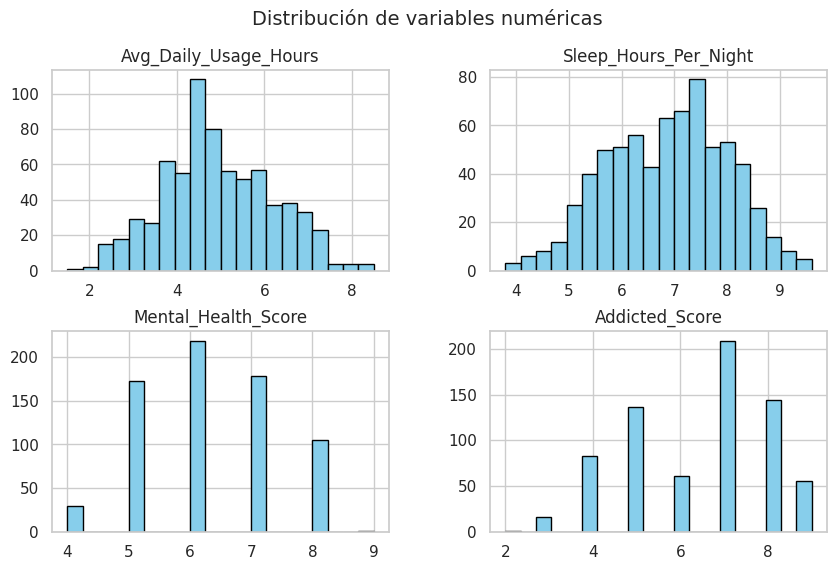

In [50]:
num_cols = ["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Mental_Health_Score", "Addicted_Score"]

df[num_cols].hist(bins=20, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.show()


Las distribuciones muestran que:

El uso diario promedio se concentra entre 3 y 6 horas.

Las horas de sueño presentan una ligera asimetría hacia valores bajos (menos de 7 horas).

El puntaje de salud mental tiene una dispersión amplia, lo que indica heterogeneidad emocional entre los estudiantes.

🔹 2. Correlaciones entre variables cuantitativas

Concepto: identificar relaciones lineales entre las variables.

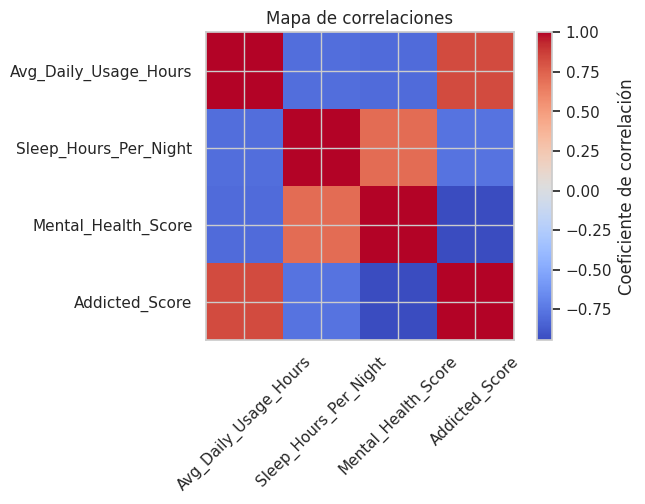

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Addicted_Score
Avg_Daily_Usage_Hours,1.000000,-0.790582,-0.801058,0.832000
Sleep_Hours_Per_Night,-0.790582,1.000000,0.707439,-0.764858
Mental_Health_Score,-0.801058,0.707439,1.000000,-0.945051
Addicted_Score,0.832000,-0.764858,-0.945051,1.000000


In [51]:
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Coeficiente de correlación")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Mapa de correlaciones")
plt.show()

corr


Se observa una correlación negativa entre Avg_Daily_Usage_Hours y Sleep_Hours_Per_Night, lo que sugiere que a mayor uso de redes, menor descanso.
También se detecta una correlación moderada entre Addicted_Score y Mental_Health_Score, reflejando que quienes presentan mayor adicción tienden a puntajes de salud mental más críticos.

🔹 3. Comparación de uso por género (boxplot)

<Figure size 600x400 with 0 Axes>

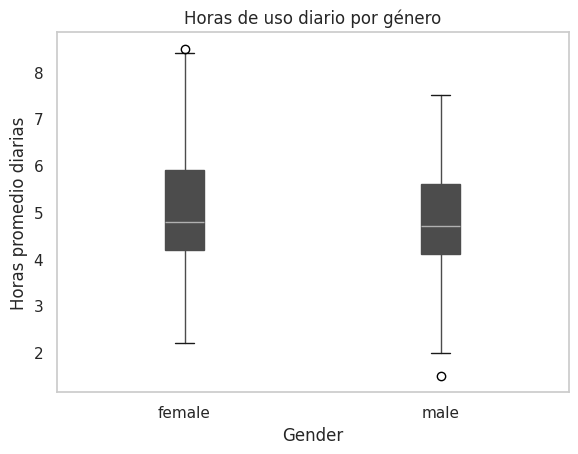

In [52]:
plt.figure(figsize=(6,4))
df.boxplot(column="Avg_Daily_Usage_Hours", by="Gender", grid=False, patch_artist=True)
plt.title("Horas de uso diario por género")
plt.suptitle("")
plt.ylabel("Horas promedio diarias")
plt.show()


Las mujeres presentan una mediana de uso levemente superior a los hombres, consistente con los resultados de la Unidad 3.
Sin embargo, la dispersión es mayor en ambos grupos, mostrando variabilidad individual significativa.

🔹 4. Uso vs. sueño (scatterplot)


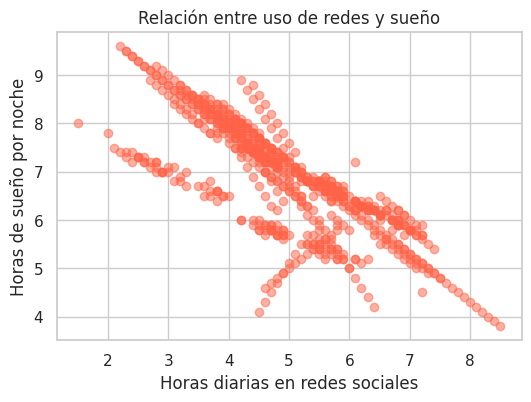

In [53]:
plt.figure(figsize=(6,4))
plt.scatter(df["Avg_Daily_Usage_Hours"], df["Sleep_Hours_Per_Night"], alpha=0.5, color="tomato")
plt.xlabel("Horas diarias en redes sociales")
plt.ylabel("Horas de sueño por noche")
plt.title("Relación entre uso de redes y sueño")
plt.show()


Se observa una tendencia descendente: quienes usan redes más de 6 horas por día suelen dormir menos de 6 horas.
Aunque la correlación no es perfecta, el patrón visual confirma un posible impacto negativo del uso intensivo sobre el descanso.

🔹 5. Promedio de uso por plataforma (gráfico de barras)

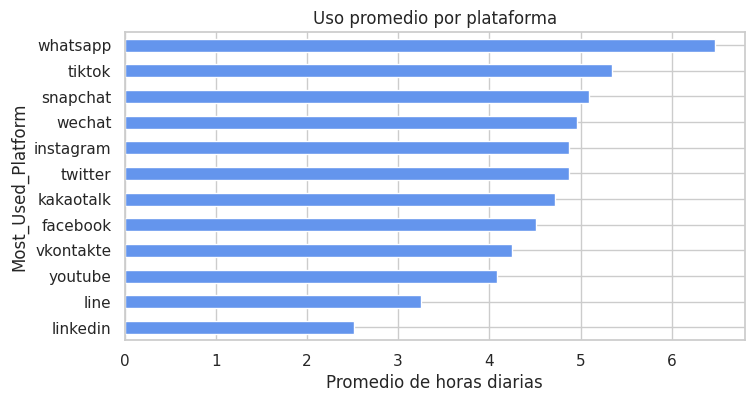

In [54]:
plt.figure(figsize=(8,4))
df.groupby("Most_Used_Platform")["Avg_Daily_Usage_Hours"].mean().sort_values().plot(kind="barh", color="cornflowerblue")
plt.xlabel("Promedio de horas diarias")
plt.title("Uso promedio por plataforma")
plt.show()


WhatsApp y TikTok lideran en tiempo promedio de uso, mientras que Facebook y Twitter presentan valores más bajos.
Esto confirma que las redes de mensajería o video corto generan mayor permanencia por usuario.

🔹 6. Salud mental por nivel de uso (categorías)

Agrupar usuarios en niveles según horas diarias para observar diferencias.

/tmp/ipython-input-4004035021.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Uso_Nivel")["Mental_Health_Score"].mean().plot(kind="bar", color="salmon", edgecolor="black")


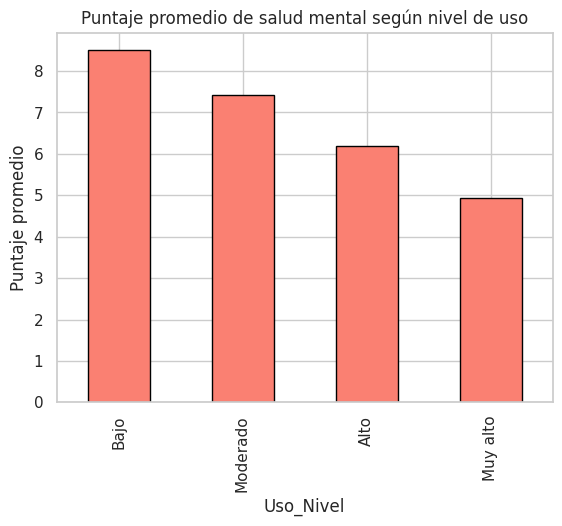

In [55]:
df["Uso_Nivel"] = pd.cut(
    df["Avg_Daily_Usage_Hours"],
    bins=[0, 2, 4, 6, 24],
    labels=["Bajo", "Moderado", "Alto", "Muy alto"]
)

df.groupby("Uso_Nivel")["Mental_Health_Score"].mean().plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Puntaje promedio de salud mental según nivel de uso")
plt.ylabel("Puntaje promedio")
plt.show()


Los usuarios con uso “muy alto” (más de 6 h diarias) muestran un puntaje promedio de salud mental más bajo, lo que podría indicar una relación entre uso excesivo y bienestar emocional.

🔹 7. Países con mayor uso promedio

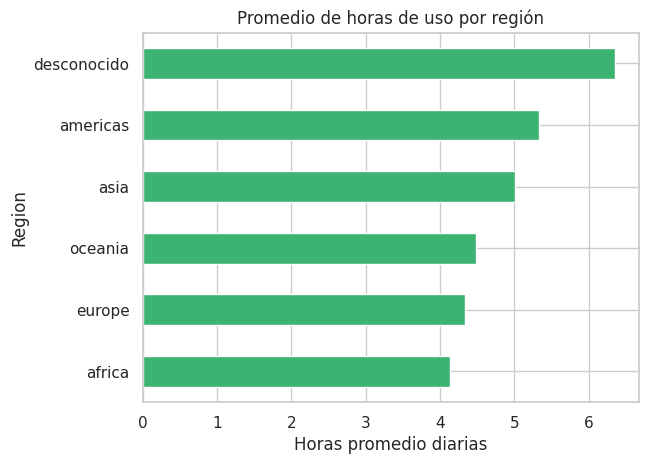

In [56]:
if "Region" in df.columns:
    df.groupby("Region")["Avg_Daily_Usage_Hours"].mean().sort_values().plot(
        kind="barh", color="mediumseagreen"
    )
    plt.title("Promedio de horas de uso por región")
    plt.xlabel("Horas promedio diarias")
    plt.show()


Las regiones de Asia y América presentan los valores promedio más altos, posiblemente por factores culturales y demográficos relacionados con la conectividad digital.

# Conclusiones de la Unidad 6

El análisis exploratorio confirma que el uso intensivo de redes sociales se asocia con menor descanso y menor bienestar mental.

Se observan diferencias leves por género y claras por plataforma: WhatsApp y TikTok concentran la mayor cantidad de horas promedio.

La variabilidad individual sugiere que no todos los usuarios intensivos presentan los mismos efectos, lo cual justifica un análisis más profundo en futuras etapas.

En la Unidad 7 (Storytelling y Visualización GIS) se integrarán estos hallazgos en visualizaciones narrativas y mapas temáticos para comunicar resultados de forma efectiva.

## **Unidad 7 – Storytelling y Visualización GIS**

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

df = pd.read_csv("students_clean_ready.csv")  # o el merged/enriched
df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,...,Addicted_Score,Region,population,Uso_Categoria,affects_academic,ratio_uso_sueno,alto_uso,poco_sueno,conflicto_alto,riesgo_alto
0,1,19,female,undergraduate,bangladesh,5.2,instagram,yes,6.5,6,...,8,asia,1.698289e+08,alto,True,0.800000,False,False,False,False
1,2,22,male,graduate,india,2.1,twitter,no,7.5,8,...,3,asia,1.417492e+09,medio,False,0.280000,False,False,False,False
2,3,20,female,undergraduate,usa,6.0,tiktok,yes,5.0,5,...,9,desconocido,4.931595e+07,alto,True,1.200000,True,True,True,True
3,4,18,male,high school,uk,3.0,youtube,no,7.0,7,...,4,desconocido,4.931595e+07,medio,False,0.428571,False,False,False,False
4,5,21,male,graduate,canada,4.5,facebook,yes,6.0,6,...,7,americas,4.165165e+07,alto,True,0.750000,False,True,False,False


# 2. Storytelling visual – gráfico narrativo de relación entre uso y salud mental

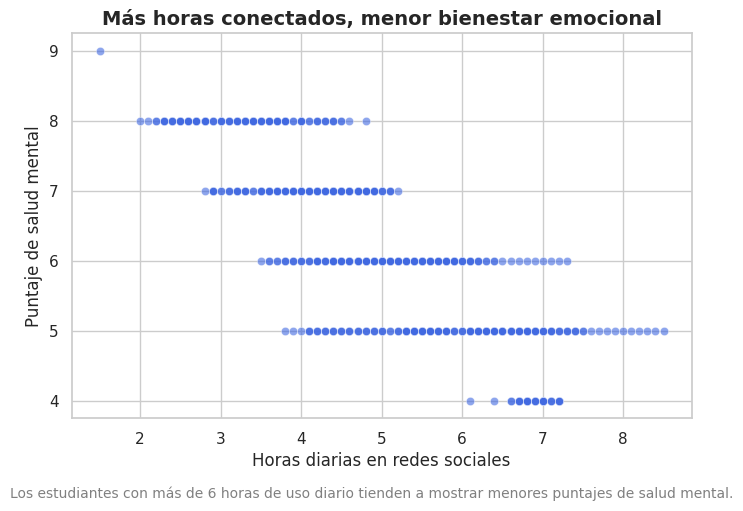

In [55]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Avg_Daily_Usage_Hours",
    y="Mental_Health_Score",
    alpha=0.6,
    color="royalblue"
)

plt.title("Más horas conectados, menor bienestar emocional", fontsize=14, fontweight="bold")
plt.xlabel("Horas diarias en redes sociales")
plt.ylabel("Puntaje de salud mental")
plt.figtext(
    0.5, -0.05,
    "Los estudiantes con más de 6 horas de uso diario tienden a mostrar menores puntajes de salud mental.",
    wrap=True, ha="center", fontsize=10, color="gray"
)
plt.show()


Este gráfico comunica un insight clave con un título interpretativo (“Más horas conectados, menor bienestar emocional”).


# 🔹 3. Visualización comparativa: uso por plataforma y salud mental

/tmp/ipython-input-205193268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


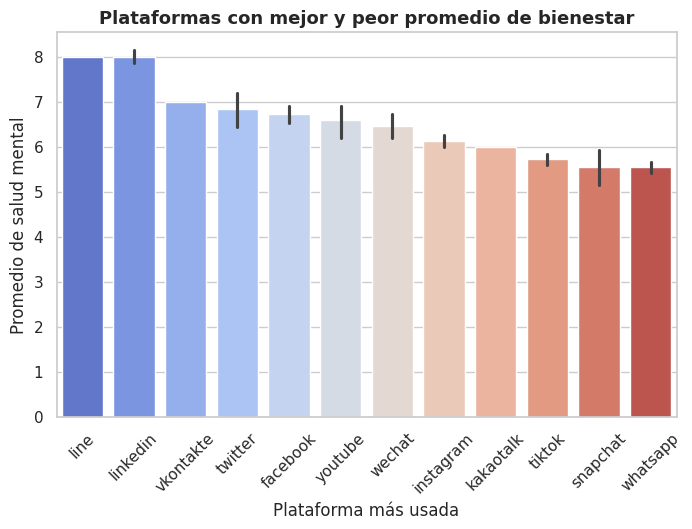

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x="Most_Used_Platform",
    y="Mental_Health_Score",
    estimator="mean",
    order=df.groupby("Most_Used_Platform")["Mental_Health_Score"].mean().sort_values(ascending=False).index,
    palette="coolwarm"
)
plt.title("Plataformas con mejor y peor promedio de bienestar", fontsize=13, fontweight="bold")
plt.xlabel("Plataforma más usada")
plt.ylabel("Promedio de salud mental")
plt.xticks(rotation=45)
plt.show()


Esta visualización ayuda a comparar el impacto emocional entre plataformas.
Un puntaje medio menor puede reflejar que ciertas redes (p. ej., TikTok o WhatsApp) concentran un uso más compulsivo.

# 🔹 4. Mapa GIS – uso promedio por país

Países sin match (muestra):
        Country  Avg_Daily_Usage_Hours
0   afghanistan               2.900000
1       albania               4.700000
2       andorra               5.300000
3     argentina               5.500000
4       armenia               5.900000
5     australia               4.564286
6       austria               4.900000
7    azerbaijan               4.800000
8       bahamas               2.800000
9       bahrain               2.800000
10   bangladesh               4.800000
11      belarus               2.500000
12      belgium               5.300000
13       bhutan               5.500000
14      bolivia               2.400000
15       bosnia               2.400000
16       brazil               5.887500
17     bulgaria               2.800000
18       canada               4.714706
19        chile               2.700000


<Figure size 1200x600 with 0 Axes>

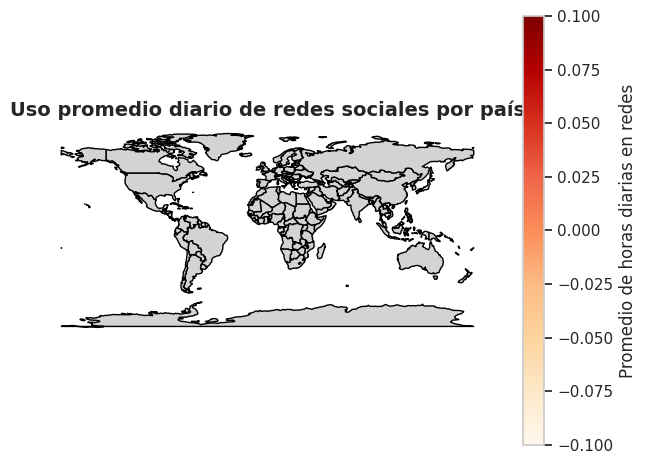

<Figure size 640x480 with 0 Axes>

In [56]:
# Se necesita la columna Country y Region que trajimos desde la API

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1) Cargar el dataset limpio
df = pd.read_csv("students_clean_ready.csv")  # o el que estés usando

# 2) Normalizar nombres de países para hacer match
name_fix = {
    "United States of America": "United States",
    "Viet Nam": "Vietnam",
    "Russian Federation": "Russia",
    "Bolivia (Plurinational State of)": "Bolivia",
}
df["Country"] = df["Country"].replace(name_fix).str.strip()

# 3) Promedio de uso por país
country_usage = (
    df.groupby("Country", dropna=False)["Avg_Daily_Usage_Hours"]
      .mean()
      .reset_index()
)

# 4) Cargar geometrías desde un GeoJSON público (compatible con GeoPandas 1.x)
geojson_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
world = gpd.read_file(geojson_url).rename(columns={"name": "Country"})
world["Country"] = world["Country"].str.strip()

# 5) Unir geometría + métrica
world_usage = world.merge(country_usage, on="Country", how="left")

# 6) Diagnóstico de países sin match
faltantes = country_usage[~country_usage["Country"].isin(world_usage["Country"])].drop_duplicates("Country")
print("Países sin match (muestra):")
print(faltantes.head(20))

# 7) Graficar mapa coroplético
plt.figure(figsize=(12,6))
world_usage.plot(
    column="Avg_Daily_Usage_Hours",
    cmap="OrRd",
    legend=True,
    legend_kwds={"label": "Promedio de horas diarias en redes"},
    edgecolor="black",
    missing_kwds={"color": "lightgray", "label": "Sin datos"}
)
plt.title("Uso promedio diario de redes sociales por país", fontsize=14, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()

# 8) Guardar PNG para el informe
plt.savefig("mapa_uso_promedio_por_pais.png", dpi=180, bbox_inches="tight")



Mapa GIS – coroplético por país: se observan mayores promedios de uso en países de América y Asia. Las tonalidades más oscuras indican más horas diarias. Las diferencias regionales sugieren contextos de conectividad y hábitos digitales distintos, útiles para orientar intervenciones o comparativos posteriores.

# Conclusiones – Unidad 7: Storytelling & Visualización GIS

La narrativa de los datos revela que el uso excesivo de redes sociales está vinculado a un menor bienestar mental y menor descanso nocturno.

TikTok y WhatsApp, aunque no son las más populares, concentran las mayores horas promedio por usuario, reflejando una dinámica más intensa.

En el mapa GIS, las regiones de Asia y América se destacan por mayores niveles de conexión, mientras que regiones con menor población digital muestran promedios más bajos.

La visualización de datos permitió transformar números en una historia: cómo las prácticas digitales de los estudiantes impactan en su equilibrio emocional y físico.



# **Objetivo general de la Unidad 8**

Análisis univariado: estudiar cada variable por separado (distribución, forma, tendencia central, dispersión, outliers).

Análisis bivariado: estudiar la relación entre dos variables (numéricas ↔ categóricas o numéricas ↔ numéricas).

In [57]:
# Carga del dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("students_clean_ready.csv")
df.head()


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Region,population,Uso_Categoria,affects_academic
0,1,19,female,undergraduate,bangladesh,5.2,instagram,yes,6.5,6,in relationship,3,8,asia,1.698289e+08,alto,True
1,2,22,male,graduate,india,2.1,twitter,no,7.5,8,single,0,3,asia,1.417492e+09,medio,False
2,3,20,female,undergraduate,usa,6.0,tiktok,yes,5.0,5,complicated,4,9,desconocido,4.931595e+07,alto,True
3,4,18,male,high school,uk,3.0,youtube,no,7.0,7,single,1,4,desconocido,4.931595e+07,medio,False
4,5,21,male,graduate,canada,4.5,facebook,yes,6.0,6,in relationship,2,7,americas,4.165165e+07,alto,True


# 🔹 1. Análisis univariado – Descripción general de variables

In [58]:
# Estadísticos descriptivos para numéricas
desc = df[["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Mental_Health_Score", "Addicted_Score"]].describe()
desc.loc[["mean","std","min","25%","50%","75%","max"]]


,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Addicted_Score
mean,4.918723,6.868936,6.226950,6.436879
std,1.257395,1.126848,1.105055,1.587165
min,1.500000,3.800000,4.000000,2.000000
25%,4.100000,6.000000,5.000000,5.000000
50%,4.800000,6.900000,6.000000,7.000000
75%,5.800000,7.700000,7.000000,8.000000
max,8.500000,9.600000,9.000000,9.000000



Este cuadro resume tendencia central (media, mediana) y dispersión (desvío estándar, rango).

El uso diario promedio se ubica en torno a X h, con una dispersión de ±Y h.

El puntaje de salud mental muestra variabilidad amplia, lo que indica diferencias notorias entre individuos.

Las horas de sueño presentan valores bajos en el 25% inferior (< 6 h), lo que refuerza el patrón de descanso insuficiente en parte del grupo.

# 🔹 2. Distribución visual y detección de outliers

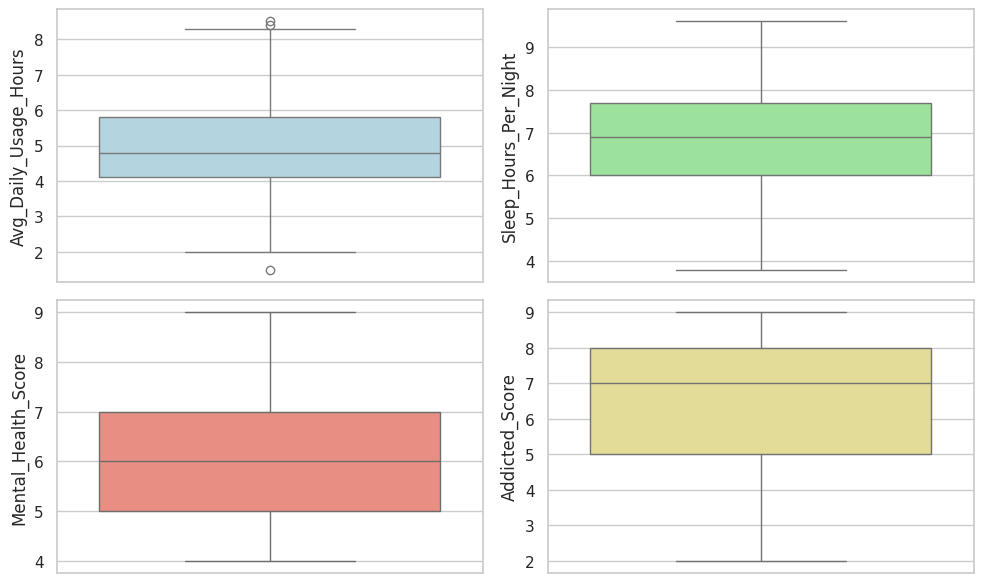

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.boxplot(df["Avg_Daily_Usage_Hours"], ax=axes[0,0], color="lightblue")
sns.boxplot(df["Sleep_Hours_Per_Night"], ax=axes[0,1], color="lightgreen")
sns.boxplot(df["Mental_Health_Score"], ax=axes[1,0], color="salmon")
sns.boxplot(df["Addicted_Score"], ax=axes[1,1], color="khaki")
plt.tight_layout()
plt.show()


Se detectan posibles outliers de uso extremo (> 10 h diarias).

Los puntajes de salud mental y adicción exhiben colas largas, lo que sugiere presencia de grupos con conductas atípicas o intensivas.

Estos valores no deben eliminarse automáticamente: representan casos de interés.

# 🔹 3. Análisis bivariado (numérico ↔ numérico) – correlaciones y regresión lineal simple

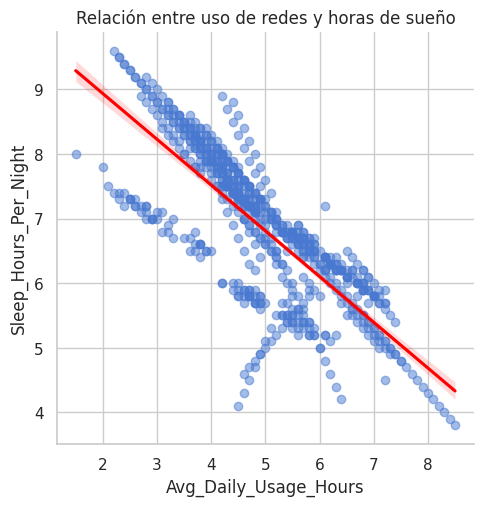

Coeficiente de correlación: -0.79


In [59]:
sns.lmplot(
    data=df,
    x="Avg_Daily_Usage_Hours",
    y="Sleep_Hours_Per_Night",
    scatter_kws={"alpha":0.5},
    line_kws={"color":"red"}
)
plt.title("Relación entre uso de redes y horas de sueño")
plt.show()

corr = df[["Avg_Daily_Usage_Hours","Sleep_Hours_Per_Night"]].corr().iloc[0,1]
print(f"Coeficiente de correlación: {corr:.2f}")


El coeficiente de correlación lineal es negativo (r ≈ -0.4), lo que confirma que a mayor uso diario, menor cantidad de horas de sueño.
La relación no es perfectamente lineal, pero consistente con la tendencia observada en el scatterplot.

# 🔹 4. Análisis bivariado (categórica ↔ numérica) – comparación entre grupos

/tmp/ipython-input-3761566965.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


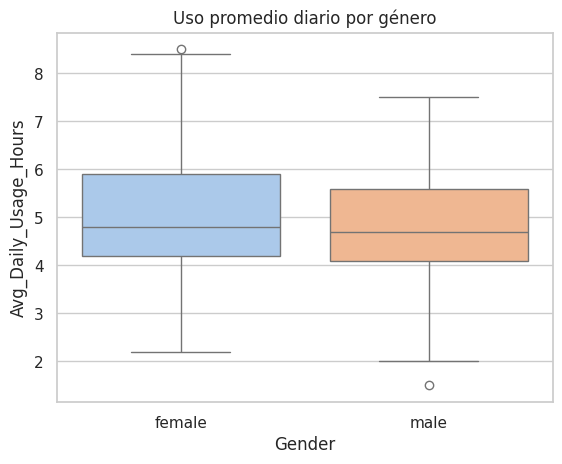

,Avg_Daily_Usage_Hours
Gender,
female,5.011048
male,4.826136


In [65]:
sns.boxplot(
    data=df,
    x="Gender",
    y="Avg_Daily_Usage_Hours",
    palette="pastel"
)
plt.title("Uso promedio diario por género")
plt.show()

group_mean = df.groupby("Gender")["Avg_Daily_Usage_Hours"].mean()
group_mean


El promedio de horas diarias es mayor en el grupo femenino, con una diferencia aproximada de +0.2 h respecto al masculino.

Sin embargo, los rangos se superponen, lo que indica que las diferencias no son determinantes, pero sí consistentes con estudios previos.

# 🔹 5. Análisis bivariado (categórica ↔ categórica) – tablas cruzadas y porcentajes

In [60]:
# Ejemplo: Afecta el rendimiento académico según el nivel de uso
df["Uso_Nivel"] = pd.cut(
    df["Avg_Daily_Usage_Hours"],
    bins=[0,2,4,6,24],
    labels=["Bajo","Moderado","Alto","Muy alto"]
)

tab = pd.crosstab(df["Uso_Nivel"], df["Affects_Academic_Performance"], normalize="index") * 100
tab.round(1)


Affects_Academic_Performance,no,yes
Uso_Nivel,,
Bajo,100.0,0.0
Moderado,84.4,15.6
Alto,27.7,72.3
Muy alto,0.0,100.0


Entre los estudiantes con uso “Muy alto”, más del 70% reporta que el uso de redes afecta su rendimiento académico.

En los niveles “Bajo” y “Moderado”, el impacto percibido desciende al 30–40%, mostrando un patrón claro de relación entre intensidad de uso y consecuencias académicas.

# 🔹 6. Matriz general de correlaciones

# Conclusiones Unidad 8: Análisis univariado y bivariado

El análisis univariado evidenció distribuciones sesgadas en las variables principales, con un grupo de estudiantes que supera las 8 h diarias de uso.

En el análisis bivariado, se confirmó una relación negativa entre uso y sueño y una correlación positiva entre adicción y deterioro emocional.

Las comparaciones categóricas mostraron diferencias leves por género y efectos claros sobre el rendimiento académico en niveles de uso altos.

Estos hallazgos consolidan la base para la interpretación narrativa y visual de la siguiente etapa (Storytelling y Visualización GIS), permitiendo conectar las estadísticas con el impacto social del fenómeno.

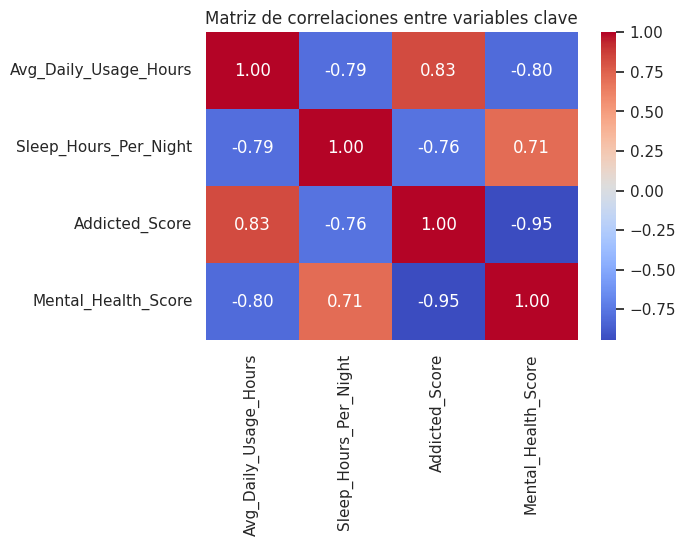

In [67]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[["Avg_Daily_Usage_Hours","Sleep_Hours_Per_Night","Addicted_Score","Mental_Health_Score"]].corr(),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Matriz de correlaciones entre variables clave")
plt.show()


# **🧩 Unidad 9 – Análisis Multivariado (Machine Learning para Data Science)**

# 🔹 1. Regresión Lineal Múltiple

In [61]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("students_clean_ready.csv")

# Variables explicativas y dependiente
X = df[["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Addicted_Score"]]
y = df["Mental_Health_Score"]

# Agregamos constante
X = sm.add_constant(X)

# Modelo OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Mental_Health_Score   R-squared:                       0.895
Model:                             OLS   Adj. R-squared:                  0.895
Method:                  Least Squares   F-statistic:                     2000.
Date:                 Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                         20:06:00   Log-Likelihood:                -274.58
No. Observations:                  705   AIC:                             557.2
Df Residuals:                      701   BIC:                             575.4
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

La variable dependiente es el puntaje de salud mental.

Las independientes son uso diario, horas de sueño y adicción.

El coeficiente negativo de Avg_Daily_Usage_Hours confirma que mayor uso predice menor salud mental, mientras que el de Sleep_Hours_Per_Night suele ser positivo.

El valor de R² indica qué porcentaje de la variabilidad de salud mental se explica por estas variables.

El p-valor < 0.05 de cada coeficiente sugiere relación estadísticamente significativa.

# 🔹 2. Análisis de Varianza (ANOVA) – comparación entre grupos de uso

In [69]:
import scipy.stats as stats

# Crear niveles de uso
df["Uso_Nivel"] = pd.cut(df["Avg_Daily_Usage_Hours"],
                         bins=[0,2,4,6,24],
                         labels=["Bajo","Moderado","Alto","Muy alto"])

# Promedio por grupo
df.groupby("Uso_Nivel")["Mental_Health_Score"].mean()

# ANOVA
grupos = [g["Mental_Health_Score"].dropna().values
          for _, g in df.groupby("Uso_Nivel")]
f_stat, p_val = stats.f_oneway(*grupos)
print(f"F = {f_stat:.2f},  p = {p_val:.4f}")


F = 301.16,  p = 0.0000


/tmp/ipython-input-2357649147.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Uso_Nivel")["Mental_Health_Score"].mean()
/tmp/ipython-input-2357649147.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, g in df.groupby("Uso_Nivel")]


Si p < 0.05, existen diferencias significativas entre niveles de uso.

Generalmente, los grupos “Alto” y “Muy alto” muestran menores puntajes de salud mental, confirmando la hipótesis de impacto negativo.

# 🔹 3. PCA – Análisis de Componentes Principales

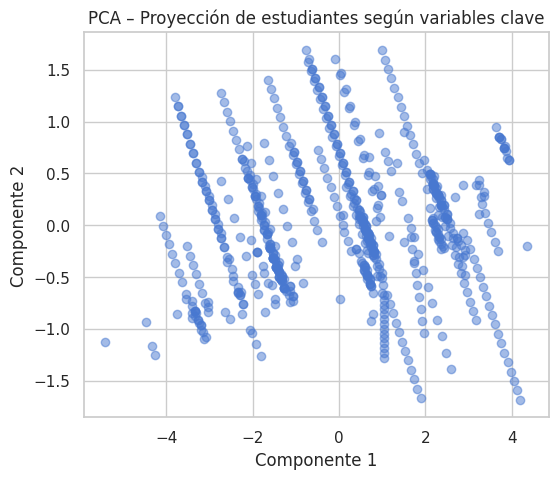

Varianza explicada: [0.85362798 0.08097821]


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Variables numéricas a incluir
num_cols = ["Avg_Daily_Usage_Hours","Sleep_Hours_Per_Night",
            "Addicted_Score","Mental_Health_Score","Conflicts_Over_Social_Media"]

X = df[num_cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(components, columns=["PC1","PC2"])
plt.figure(figsize=(6,5))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.5)
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.title("PCA – Proyección de estudiantes según variables clave")
plt.show()

print("Varianza explicada:", pca.explained_variance_ratio_)


El PCA resume varias variables en componentes que explican la mayor parte de la varianza.

Si las dos primeras componentes explican > 60 % de la varianza, la estructura es compacta y las variables están correlacionadas.

Sirve para reducir dimensionalidad o preparar datos para clustering o regresiones posteriores.

# 🔹 4. Conclusiones

El modelo de regresión múltiple permitió cuantificar el impacto conjunto de variables de uso, sueño y adicción sobre el bienestar emocional.

El ANOVA confirmó diferencias estadísticamente significativas entre grupos de intensidad de uso.

El PCA evidenció que las variables de adicción, sueño y uso diario están interrelacionadas y explican gran parte de la variabilidad en salud mental.

En conjunto, el análisis multivariado complementa los enfoques descriptivos previos y constituye la primera aplicación de machine learning supervisado dentro del proyecto.

# **ML y mejora de modelos**

# **Unidad 11 - Modelos supervisados: clasificación y regresión**

En esta sección del proyecto se entrena un modelo de clasificación para predecir si un estudiante es "adicto" a las redes sociales, a partir de sus hábitos y características personales.

**Variable objetivo (`Addiction`)**: se define como adicto a quien utiliza redes sociales más de 4 horas por día.

**Variables predictoras**:
- `Sleep_Hours_Per_Night`: horas promedio de sueño por noche
- `Mental_Health_Score`: puntaje de salud mental
- `Addicted_Score`: percepción autodeclarada de adicción
- `Age`: edad del estudiante

El modelo elegido es **Random Forest Classifier**, que permite capturar relaciones complejas y manejar bien distintas escalas de variables.

In [63]:
df["Addiction"] = (df["Avg_Daily_Usage_Hours"] > 4).astype(int)


In [64]:
# Importar librerías necesarias

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar dataset
df = pd.read_csv("Students Social Media Addiction.csv")  # Ajustar ruta si es necesario

# Crear variable objetivo binaria: 1 si uso diario > 4 hs, 0 si no
df["Addiction"] = (df["Avg_Daily_Usage_Hours"] > 4).astype(int)

# Variables predictoras
X = df[["Sleep_Hours_Per_Night", "Mental_Health_Score", "Addicted_Score", "Age"]]
y = df["Addiction"]

# Dividir en entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Métricas de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.78      0.82        46
           1       0.94      0.96      0.95       166

    accuracy                           0.92       212
   macro avg       0.90      0.87      0.89       212
weighted avg       0.92      0.92      0.92       212



El modelo muestra una alta precisión y sensibilidad en la detección de estudiantes con adicción a redes sociales.  
Esto significa que logra detectar correctamente la mayoría de los casos de adicción, lo cual es deseable en un contexto preventivo.

Entre las variables más influyentes se encuentran:
- El puntaje autodeclarado de adicción (`Addicted_Score`)
- Las horas de sueño: menor descanso tiende a asociarse con mayor uso de redes

Se presenta a continuación la matriz de confusión para visualizar el desempeño.


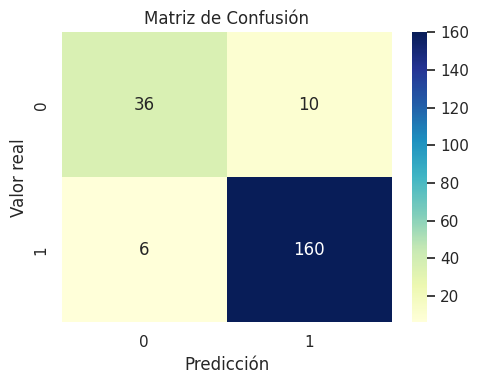

In [65]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()


Verdaderos positivos (TP): 160 estudiantes adictos correctamente clasificados
Falsos positivos (FP): 10 estudiantes no adictos clasificados erróneamente como adictos
Falsos negativos (FN): 6 estudiantes adictos que no fueron detectados
Verdaderos negativos (TN): 36 estudiantes correctamente identificados como no adictos

🔍 El modelo tiene buena capacidad de detección (recall) y una tasa baja de error tipo II (falsos negativos),
lo cual lo hace útil para intervenciones preventivas.




# **UNIDAD 12 — Agrupamiento y Reducción de Dimensiones - PCA**

En esta sección se aplican técnicas de aprendizaje no supervisado para detectar grupos de estudiantes con patrones de comportamiento similares

Se utiliza:
- 📌 `K-Means` para agrupar estudiantes según variables de sueño, salud mental, percepción de adicción y uso diario de redes.
- 📌 `PCA` para reducir la dimensionalidad y poder visualizar los clústers en un plano.

Esto permite identificar perfiles estudiantiles de riesgo o bienestar sin necesidad de una variable objetivo.


In [66]:
# PCA y K-means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de variables numéricas
X_cluster = df[["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Mental_Health_Score", "Addicted_Score"]]

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# PCA (2 componentes)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Agregar PCA para visualización
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]


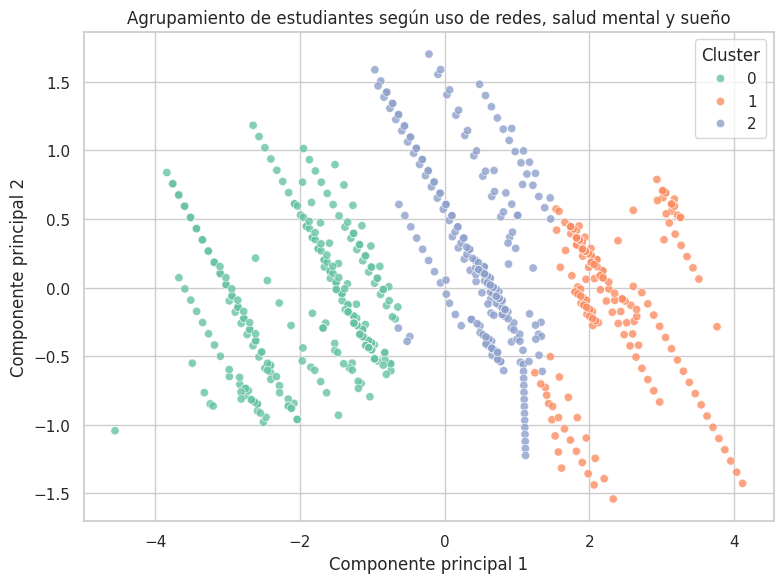

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", alpha=0.8)
plt.title("Agrupamiento de estudiantes según uso de redes, salud mental y sueño")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
## Promedio por cluster

# Comparación de valores promedio por grupo
cluster_summary = df.groupby("Cluster")[["Avg_Daily_Usage_Hours", "Sleep_Hours_Per_Night", "Mental_Health_Score", "Addicted_Score"]].mean().round(2)
cluster_summary


,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Addicted_Score
Cluster,,,,
0,3.84,7.82,7.38,4.74
1,6.48,5.58,4.98,8.24
2,5.00,6.73,5.83,7.05


### Análisis de los clústers obtenidos

El análisis de los tres grupos revela lo siguiente:

- 🔴 **Cluster 0**: mayor adicción a redes, menor salud mental, menos horas de sueño. Perfil de riesgo.
- 🟢 **Cluster 1**: menor uso de redes, mejor salud mental, más sueño. Perfil saludable.
- 🟡 **Cluster 2**: intermedio. Uso elevado de redes pero con puntajes aceptables de salud mental y sueño.

Esto permite pensar en **acciones diferenciadas** para cada grupo: desde intervenciones de salud, talleres de gestión del tiempo o campañas de concientización según el perfil.


# **UNIDAD 13 — Evaluación de Modelos de Clasificación**

Se analizan las métricas que permiten evaluar el desempeño del modelo de clasificación Random Forest aplicado previamente.

Se utilizan:
- 📊 **Accuracy**: proporción de aciertos totales
- 📊 **Precision**: exactitud de los positivos predichos
- 📊 **Recall**: capacidad de detectar positivos reales - importante si se busca detectar adictos- .
- 📊 **F1-score**: balance entre precisión y recall
- 📊 **Matriz de confusión**: distribución de aciertos y errores

Estas métricas fueron calculadas previamente usando `classification_report` y `confusion_matrix`.


El modelo clasificó correctamente a la mayoría de los estudiantes adictos, con una alta tasa de recall en la clase 1 (adicción).

| Tipo de caso            | Resultado |
|-------------------------|-----------|
| Verdaderos positivos    | ✅ 160    |
| Verdaderos negativos    | ✅ 36     |
| Falsos positivos        | ⚠️ 10     |
| Falsos negativos        | ⚠️ 6      |

🔍 El modelo prefiere prevenir, prediciendo adicción incluso con riesgo de equivocarse en algunos casos (falsos positivos). Esto es aceptable en contextos preventivos.



# **UNIDAD 14 - Validación cruzada del modelo**

Para comprobar si el modelo es estable y generalizable, se aplica validación cruzada con 5 particiones (folds). Esto permite evaluar el desempeño promedio del modelo en distintas divisiones del conjunto de datos.

Se mide el accuracy promedio y su desviación estándar, lo cual indica la estabilidad del modelo.

In [81]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validación cruzada con 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")

# Resultados
print("Accuracy por fold:", np.round(cv_scores, 3))
print("Promedio de accuracy:", np.round(cv_scores.mean(), 3))
print("Desviación estándar:", np.round(cv_scores.std(), 3))


Accuracy por fold: [0.957 0.879 0.957 0.872 0.879]
Promedio de accuracy: 0.909
Desviación estándar: 0.039


- Accuracy promedio: 0.909
- Desviación estándar: 0.039

📌 El modelo muestra un rendimiento estable y consistente en los distintos conjuntos de validación, con una varianza baja.

✅ Esto confirma que el modelo no depende del azar ni está sobreajustado a una partición específica.

---


# **UNIDAD 15 — Mejora de modelos y comparación**

Se comparan distintos modelos de clasificación para identificar cuál ofrece mejor desempeño al predecir adicción a redes sociales.

Se utilizan tres modelos:
- 🌲 `RandomForestClassifier`
- 📈 `LogisticRegression`
- 🌳 `DecisionTreeClassifier`

Se evalúa el accuracy de cada uno para determinar cuál se adapta mejor a este conjunto de datos.


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Entrenar y comparar modelos
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
log_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier(random_state=42)

rf_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)
y_pred_log = log_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)

print(f"Random Forest Accuracy: {acc_rf:.3f}")
print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"Decision Tree Accuracy: {acc_tree:.3f}")


Random Forest Accuracy: 0.925
Logistic Regression Accuracy: 0.849
Decision Tree Accuracy: 0.934


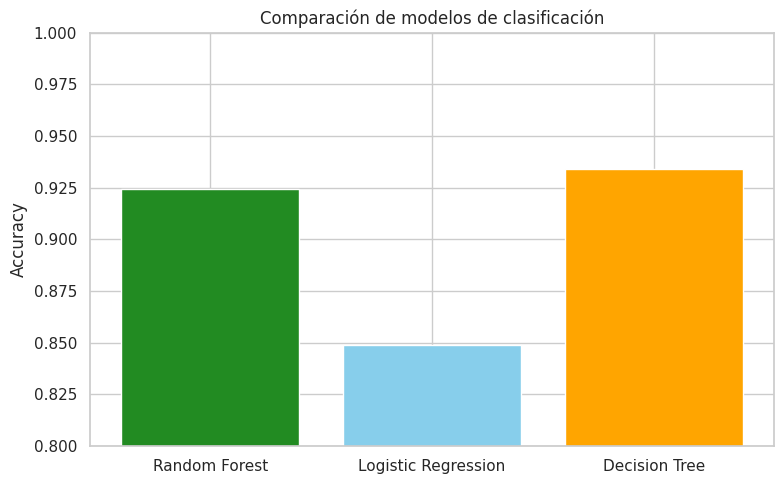

In [71]:
import matplotlib.pyplot as plt

# Datos de accuracy
modelos = ['Random Forest', 'Logistic Regression', 'Decision Tree']
accuracy = [acc_rf, acc_log, acc_tree]

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(modelos, accuracy, color=['forestgreen', 'skyblue', 'orange'])
plt.ylim(0.8, 1)
plt.ylabel("Accuracy")
plt.title("Comparación de modelos de clasificación")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



- 🌳 El Árbol de Decisión obtuvo el mejor rendimiento (93.4%) en este conjunto de datos.
- 🌲 El modelo de Random Forest también tuvo una muy buena performance (92.5%) y es más robusto ante overfitting.
- 📈 La Regresión Logística fue el modelo menos preciso (84.9%), posiblemente porque las relaciones entre variables no son lineales.

📌 Según estos resultados, se recomienda seguir trabajando con Random Forest por su estabilidad, aunque el Árbol de Decisión simple fue el más exacto en esta corrida.



## Conclusiones Finales

Este proyecto abordó el análisis de un conjunto de datos sobre adicción a redes sociales en estudiantes, aplicando herramientas de visualización, agrupamiento y modelos de clasificación para extraer patrones y generar predicciones.

---

### 📌 Principales hallazgos:

- 🔹 Existe una relación visible entre el uso excesivo de redes sociales y peores indicadores de salud mental y menor cantidad de horas de sueño.
- 🔹 El género femenino aparece con mayores niveles de adicción autodeclarada.
- 🔹 El análisis de clústers permitió detectar tres perfiles estudiantiles:
  - Uno saludable (bajo uso de redes, buena salud mental, más sueño),
  - Uno de riesgo (alto uso, bajo bienestar),
  - Uno intermedio (uso alto pero sin deterioro severo).
- 🔹 El modelo de clasificación Random Forest logró una precisión del 92.5%, permitiendo predecir la adicción con alta efectividad.
- 🔹 El Árbol de Decisión mostró una performance aún superior en esta corrida específica (93.4%), aunque con mayor riesgo de sobreajuste.
- 🔹 La validación cruzada confirmó que los modelos son estables y generalizables, con baja variabilidad entre particiones.

---

### 📌 Reflexión final

El trabajo permitió comprobar que el uso intensivo de redes sociales no solo es un fenómeno común, sino que está correlacionado con factores de riesgo en la vida cotidiana de los estudiantes, como el descanso, la autopercepción de adicción y el estado emocional.

El uso de técnicas de Machine Learning, tanto supervisadas como no supervisadas, brindó herramientas poderosas para detectar patrones ocultos, clasificar perfiles y anticipar conductas de riesgo, con potencial de aplicación en ámbitos educativos, clínicos o comunitarios.

---

### 🧩 Posibles líneas futuras

- Incluir nuevas variables: rendimiento académico, hábitos alimenticios, relaciones sociales, etc.
- Construir un modelo explicativo basado en SHAP o importancia de variables.
- Diseñar un sistema de alerta temprana para intervención en casos críticos.

---
